In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [34]:
file_name = 'used_cars_data.csv'
df = pd.read_csv(file_name, names=['Brand', 'Model', 'Total Vehicles'])
print(df.shape)
print(df.isna().all(), '\n')

print('Total Vehicles: ', df['Total Vehicles'].sum(), '\n')
df_group = df.groupby(['Brand'])['Total Vehicles'].sum().sort_values(ascending=False).head(10)
print(df_group, '\n')

(1160, 3)
Brand             False
Model             False
Total Vehicles    False
dtype: bool 

Total Vehicles:  106696.0 

Brand
volkswagen       20969.0
opel             13016.0
bmw              12362.0
mercedes-benz     9859.0
audi              7070.0
renault           6425.0
peugeot           5627.0
fiat              5179.0
ford              4018.0
citroen           3926.0
Name: Total Vehicles, dtype: float64 



# Top 10 brands currently selling

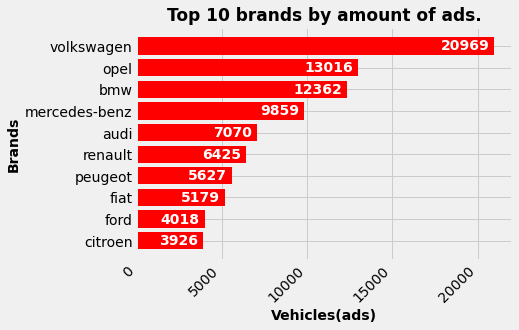

In [35]:
#plt.style.use('classic')
plt.style.use('fivethirtyeight')

df_group.sort_values(inplace=True)

# Top 10 brands
fig, ax = plt.subplots()

rects = ax.barh(df_group.index, df_group.values, color='r')

rankStr = df_group.astype(int).astype(str).tolist()
for n, rect in enumerate(rects):
    width = int(rect.get_width())
        
    # Shift the text to the left side of the right edge
    xloc = -5
    # White on magenta
    clr = 'white'
    align = 'right'
    
    # Center the text vertically in the bar
    yloc = rect.get_y() + rect.get_height() / 2
    fyloc = rect.get_y() + rect.get_height() / 2
    label = ax.annotate(rankStr[n], xy=(width, yloc), xytext=(xloc, 0),
                        textcoords="offset points",
                        ha=align, va='center',
                        color=clr, weight='bold', clip_on=True)

ax.set_title('Top 10 brands by amount of ads.', fontweight='bold', fontsize=17)
ax.set_ylabel('Brands', fontweight='bold', fontsize=14)
ax.set_xlabel('Vehicles(ads)', fontweight='bold', fontsize=14)

# Rotation x
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.savefig('top10-brands-line.png', bbox_inches='tight')

# Top 10 models by amount of ads from each of top 10 brands

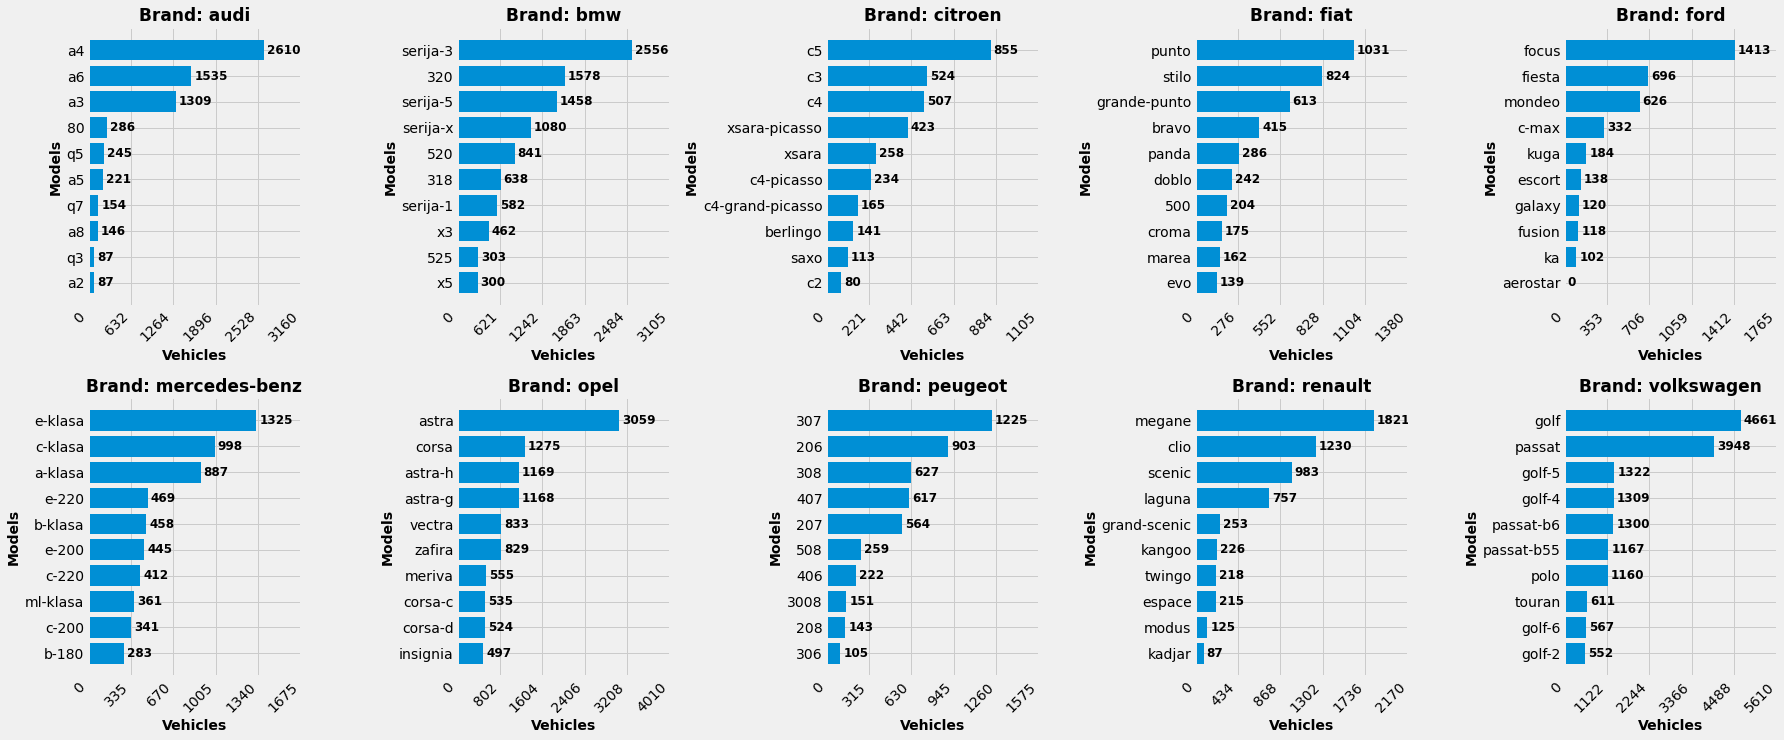

In [36]:
# All models

fig, ax = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(25, 10.5)
ax = ax.reshape(-1)

n = 0
df_models = df.loc[df['Brand'].isin(df_group.index)].groupby(['Brand'])
for name, group in df_models:
    br = group.sort_values(by=['Total Vehicles']).tail(10).groupby(['Model'])['Total Vehicles'].sum().sort_values()
    rects = ax[n].barh(br.index, br)
    
    max_br = int(br.max())
    if max_br < 1000:
        max_br = max_br + 250
    elif 2000 > max_br > 1000:
        max_br = max_br + 350
    elif 3000 > max_br > 2000:
        max_br = max_br + 550
    elif max_br > 3000:
        max_br = max_br + 950
            
    ax[n].set_xticks(list(range(0, max_br+50, round(max_br / 5))))
    
    ax[n].set_title(f'Brand: {name}', fontweight='bold', fontsize=17)
    ax[n].set_ylabel('Models', fontweight='bold', fontsize=14)
    ax[n].set_xlabel('Vehicles', fontweight='bold', fontsize=14)
    
    # Rotation x
    labels = ax[n].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')
    
    rankStr = br.astype(int).astype(str).tolist()
    for i, rect in enumerate(rects):
        width = int(rect.get_width())

        # Shift the text to the right side of the right edge
        xloc = 3
        # Black against white background
        clr = 'black'
        align = 'left'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        fyloc = rect.get_y() + rect.get_height() / 2
        label = ax[n].annotate(rankStr[i], xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True, fontsize=12)

    n += 1
    #break
  
plt.tight_layout()
plt.savefig('top10-brands-models.png', dpi=300, bbox_inches='tight')

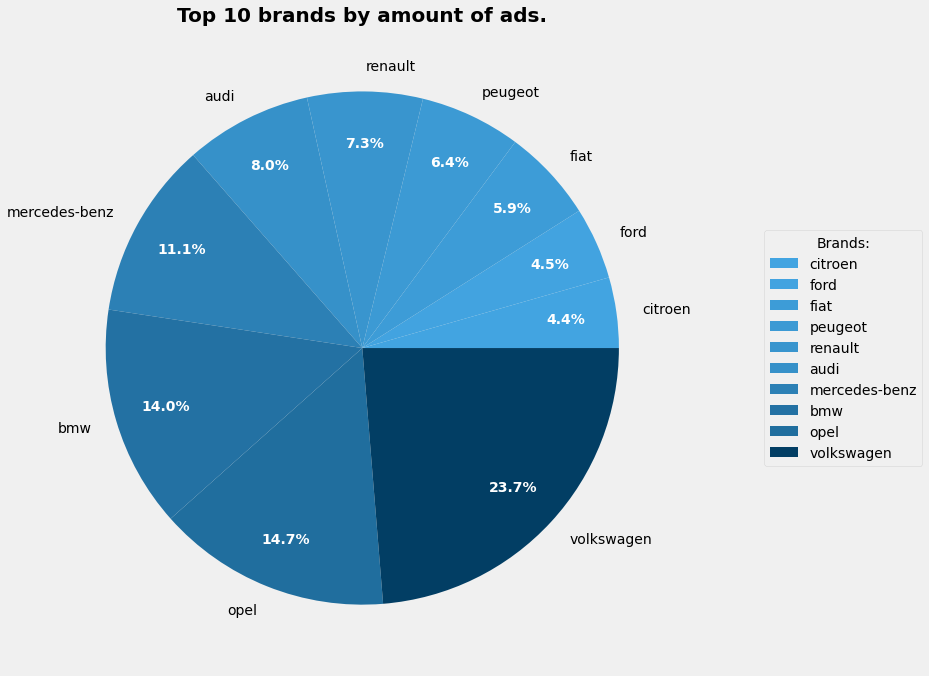

In [37]:
import matplotlib.colors as mcolors


cmap = mcolors.LinearSegmentedColormap.from_list("", ['#51BBFD', '#023E64'])

fig, ax = plt.subplots(figsize=(20, 11), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(df_group, autopct='%1.1f%%', textprops=dict(color="k"), 
                                  colors=cmap(df_group.values/df_group.values.max()), pctdistance=0.8, labels=df_group.index)

for aut in autotexts:
    aut.set_color('w')

ax.legend(wedges, df_group.index,
          title="Brands:",
          loc="center",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14, weight="bold")

ax.set_title('Top 10 brands by amount of ads.', fontweight='bold', fontsize=20)
plt.savefig('top10-brands-circle.png', bbox_inches='tight')